In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

device = torch.device('cpu')

# Augmented Neural ODEs
This notebook contains example of how to train Neural ODEs and Augmented Neural ODEs and to visualize their differences. This includes differences in how they warp the input space, how they generalize and how their ODEs map inputs to features. 

## Create and visualize training data

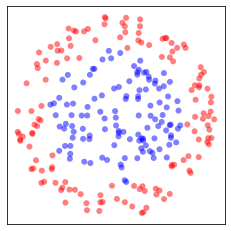

In [2]:
from experiments.dataloaders import ConcentricSphere
from torch.utils.data import DataLoader
from viz.plots import single_feature_plt

# Create training data in 2D, consisting of a concentric disk and an annulus
data_dim = 2
data_concentric = ConcentricSphere(data_dim, inner_range=(0., 1), outer_range=(1, 1.5), 
                                   num_points_inner=2000, num_points_outer=2000)
dataloader = DataLoader(data_concentric, batch_size=64, shuffle=True)

# Visualize a batch of data (use a large batch size for visualization)
dataloader_viz = DataLoader(data_concentric, batch_size=256, shuffle=True)
for inputs, targets in dataloader_viz:
    break

single_feature_plt(inputs, targets)

## Train a Neural ODE

We can now train a Neural ODE on the dataloader we have just created.

#### Set up model

In [3]:
from anode.models import ODENet
from anode.training import Trainer

hidden_dim = 32

model = ODENet(device, data_dim, hidden_dim, time_dependent=True,
               non_linearity='relu')

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [4]:
from viz.plots import get_feature_history

# Set up trainer
trainer = Trainer(model, optimizer, device)
num_epochs = 20

# Optionally record how the features evolve during training
visualize_features = True

if visualize_features:
    feature_history = get_feature_history(trainer, dataloader, inputs,
                                          targets, num_epochs)
else:
    # If we don't record feature evolution, simply train model
    trainer.train(dataloader, num_epochs)


Iteration 0/63
Loss: 0.575
Batch Accuracy: 0.438
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/63
Loss: 0.568
Batch Accuracy: 0.516
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 20/63
Loss: 0.561
Batch Accuracy: 0.422
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/63
Loss: 0.537
Batch Accuracy: 0.500
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/63
Loss: 0.482
Batch Accuracy: 0.562
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 50/63
Loss: 0.518
Batch Accuracy: 0.516
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 60/63
Loss: 0.482
Batch Accuracy: 0.562
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 0.508
Epoch 1: 0.535

Iteration 0/63
Loss: 0.395
Batch Accuracy: 0.750
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/63
Loss: 0.463
Batch Accuracy: 0.578
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/63
Loss: 0.392
Batch Accuracy: 0.672
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/63
Loss: 0.410
Batch Accuracy: 0.656
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/63
Loss: 0.455
Batch Accuracy: 0.656
NFE: 20
BNFE: 0
Total NFE: 20



Iteration 60/63
Loss: 0.035
Batch Accuracy: 0.984
NFE: 26
BNFE: 0
Total NFE: 26
Epoch 1: 0.041
Epoch 1: 0.987

Iteration 0/63
Loss: 0.019
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 10/63
Loss: 0.021
Batch Accuracy: 1.000
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 20/63
Loss: 0.042
Batch Accuracy: 0.984
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 30/63
Loss: 0.084
Batch Accuracy: 0.953
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 40/63
Loss: 0.074
Batch Accuracy: 0.969
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 50/63
Loss: 0.047
Batch Accuracy: 0.969
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 60/63
Loss: 0.037
Batch Accuracy: 1.000
NFE: 32
BNFE: 0
Total NFE: 32
Epoch 1: 0.041
Epoch 1: 0.986

Iteration 0/63
Loss: 0.035
Batch Accuracy: 0.984
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 10/63
Loss: 0.034
Batch Accuracy: 0.984
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 20/63
Loss: 0.039
Batch Accuracy: 0.984
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 30/63
Loss: 0.038
Batch Accuracy: 0.984


#### Visualize feature evolution

As can be seen, the model struggles to push the blue points out of the red circle.

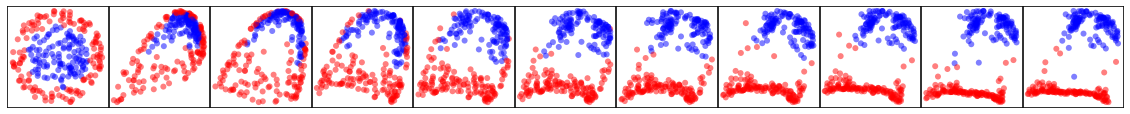

In [5]:
from viz.plots import multi_feature_plt

multi_feature_plt(feature_history[::2], targets)

#### Visualize ODE trajectories
We can also visualize how the trained model maps inputs to features.

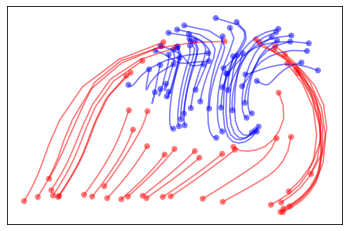

In [6]:
from viz.plots import trajectory_plt

# To make the plot clearer, we will use a smaller batch of data
for small_inputs, small_targets in dataloader:
    break

trajectory_plt(model, small_inputs, small_targets, timesteps=10)

#### Visualize generalization
To see how well the model generalizes we can plot how every point in the input space gets mapped to an output. If a point gets mapped to +1 it will be red, if it gets mapped to -1 it will be blue. 

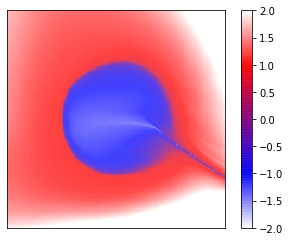

In [7]:
from viz.plots import input_space_plt

input_space_plt(model)

#### Losses and number of function evaluations

Finally we can visualize how the loss and the number of function evaluations (which is proportional to how long a forward pass takes) change during training.

Text(0, 0.5, 'Loss')

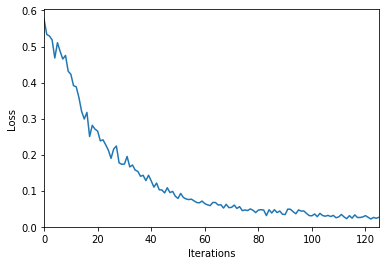

In [8]:
plt.plot(trainer.histories['loss_history'])
plt.xlim(0, len(trainer.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')

Text(0, 0.5, 'NFEs')

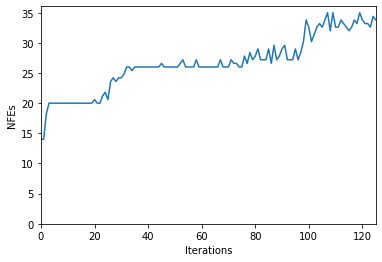

In [9]:
plt.plot(trainer.histories['nfe_history'])
plt.xlim(0, len(trainer.histories['nfe_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('NFEs')

## Train an Augmented Neural ODE

As can be seen, the Neural ODE model eventually learns to approximate the function, but does so at the cost of poor generalization and increased computational cost. We will now train an Augmented Neural ODE with one augmented dimension to attempt to mitigate these problems.

In [10]:
# Add 1 augmented dimension
anode = ODENet(device, data_dim, hidden_dim, augment_dim=5,
               time_dependent=True, non_linearity='relu')

optimizer_anode = torch.optim.Adam(anode.parameters(), lr=1e-3)

In [11]:
# Set up trainer
trainer_anode = Trainer(anode, optimizer_anode, device)
num_epochs = 20

# Optionally record how the features evolve during training
visualize_features = True

if visualize_features:
    feature_history = get_feature_history(trainer_anode, dataloader, 
                                          inputs, targets, num_epochs)
else:
    # If we don't record feature evolution, simply train model
    trainer_anode.train(dataloader, num_epochs)


Iteration 0/63
Loss: 0.504
Batch Accuracy: 0.500
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/63
Loss: 0.526
Batch Accuracy: 0.500
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/63
Loss: 0.434
Batch Accuracy: 0.672
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/63
Loss: 0.431
Batch Accuracy: 0.672
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/63
Loss: 0.436
Batch Accuracy: 0.656
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 50/63
Loss: 0.410
Batch Accuracy: 0.703
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 60/63
Loss: 0.433
Batch Accuracy: 0.625
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 0.467
Epoch 1: 0.604

Iteration 0/63
Loss: 0.398
Batch Accuracy: 0.656
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/63
Loss: 0.283
Batch Accuracy: 0.859
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/63
Loss: 0.185
Batch Accuracy: 0.984
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 30/63
Loss: 0.151
Batch Accuracy: 0.969
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/63
Loss: 0.087
Batch Accuracy: 1.000
NFE: 20
BNFE: 0
Total NFE: 20



Iteration 60/63
Loss: 0.007
Batch Accuracy: 1.000
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 0.015
Epoch 1: 0.992

Iteration 0/63
Loss: 0.006
Batch Accuracy: 1.000
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/63
Loss: 0.004
Batch Accuracy: 1.000
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/63
Loss: 0.006
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 30/63
Loss: 0.007
Batch Accuracy: 1.000
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 40/63
Loss: 0.005
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 50/63
Loss: 0.004
Batch Accuracy: 1.000
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 60/63
Loss: 0.002
Batch Accuracy: 1.000
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 0.008
Epoch 1: 0.997

Iteration 0/63
Loss: 0.003
Batch Accuracy: 1.000
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/63
Loss: 0.004
Batch Accuracy: 1.000
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 20/63
Loss: 0.008
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 30/63
Loss: 0.020
Batch Accuracy: 0.984



Iteration 50/63
Loss: 0.004
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 60/63
Loss: 0.004
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26
Epoch 1: 0.014
Epoch 1: 0.992

Iteration 0/63
Loss: 0.002
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 10/63
Loss: 0.020
Batch Accuracy: 0.984
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 20/63
Loss: 0.001
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 30/63
Loss: 0.002
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 40/63
Loss: 0.005
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 50/63
Loss: 0.003
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 60/63
Loss: 0.024
Batch Accuracy: 0.984
NFE: 26
BNFE: 0
Total NFE: 26
Epoch 1: 0.013
Epoch 1: 0.992

Iteration 0/63
Loss: 0.020
Batch Accuracy: 0.984
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 10/63
Loss: 0.041
Batch Accuracy: 0.969
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 20/63
Loss: 0.025
Batch Accuracy: 0.984



Iteration 40/63
Loss: 0.060
Batch Accuracy: 0.953
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 50/63
Loss: 0.002
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 60/63
Loss: 0.004
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26
Epoch 1: 0.010
Epoch 1: 0.993

Iteration 0/63
Loss: 0.024
Batch Accuracy: 0.984
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 10/63
Loss: 0.043
Batch Accuracy: 0.969
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 20/63
Loss: 0.001
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 30/63
Loss: 0.002
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 40/63
Loss: 0.001
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 50/63
Loss: 0.016
Batch Accuracy: 0.984
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 60/63
Loss: 0.001
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26
Epoch 1: 0.005
Epoch 1: 0.997

Iteration 0/63
Loss: 0.001
Batch Accuracy: 1.000
NFE: 26
BNFE: 0
Total NFE: 26

Iteration 10/63
Loss: 0.001
Batch Accuracy: 1.000


#### Visualize feature evolution
As can be seen, the model lifts out the disk from the surrouding annulus by going into the augmented dimension.

In [13]:
from viz.plots import multi_feature_plt
plt.figure()
multi_feature_plt(feature_history, targets)

UnboundLocalError: local variable 'fig' referenced before assignment

<Figure size 432x288 with 0 Axes>

#### Visualize ODE trajectories

We can visualize how the augmented model maps inputs to features.

In [ ]:
from viz.plots import trajectory_plt

trajectory_plt(anode, small_inputs, small_targets, timesteps=10)

In [ ]:
#### Visualize generalization
As can be seen, the model generalizes well and has captured the shape of the data.

In [ ]:
from viz.plots import input_space_plt

input_space_plt(anode)

#### Visualize losses and NFEs

As can be seen, the Augmented Neural ODE model achieves low losses and low NFEs. This suggests it has learned to model the data with a simple flow that is easy to compute.

In [ ]:
plt.plot(trainer_anode.histories['loss_history'])
plt.xlim(0, len(trainer_anode.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')

In [ ]:
plt.plot(trainer_anode.histories['nfe_history'])
plt.xlim(0, len(trainer_anode.histories['nfe_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('NFEs')